In [1]:
# importing packages and nltk data libraries
import string
import json
import codecs
import re

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from colorama import Fore, Back, Style
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rayhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
def computeSentiment(lTokens, setPosWords, setNegWords):
    """
    Compute the overall sentiment of the list of tokens in lTokens, using the countWordSentimentAnalysis approach.
    
    @param lTokens: List of tokens to calculate the overall sentiment for.
    @param setPosWords: Set of positive words.
    @param setNegWords: Set of negative words.
    
    @returns Sentiment score for lTokens.
    """
    posNum = len([tok for tok in lTokens if tok in setPosWords])

    negNum = len([tok for tok in lTokens if tok in setNegWords])

    sentiment = posNum - negNum
                
    return sentiment


In [3]:
def printColouredTokens(lTokens, setPosWords, setNegWords, sentiment):
    """
    Print out the tokens in different colours, according to sentiment.
    If positive, in red.
    If negative, in blue.
    Otherwise no colouring.
    
    @param lTokens: List of tokens to print and colour.
    @param setPosWords: Set of positive words.
    @param setNegWords: Set of negative words.
    @param sentiment: Sentiment score of list of tokens.
    """
        
    for token in lTokens:
        if token in setPosWords:
            print(Fore.RED + token + ', ', end='')
        elif token in setNegWords:
            print(Fore.BLUE + token + ', ', end='')
        else:
            print(Style.RESET_ALL + token + ', ', end='')

    print(': {}'.format(sentiment))
    

In [12]:
def countWordSentimentAnalysis(setPosWords, setNegWords, fCsvName, bPrint, redditProcessor):
    """
    Basic sentiment analysis.  Count the number of positive words, count the negative words, overall polarity is the
    difference in the two numbers.

    @param setPosWords: set of positive sentiment words
    @param setNegWords: set of negative sentiment words
    @param sFilename: name of input file containing a json formated dump
    @param bPrint: whether to print the stream of tokens and sentiment.  Uses colorama to highlight sentiment words.
    @param redditProcessor: RedditProcessing object, used to pre-process each tweet.

    @returns: list of reddit posts, in the format of [date, sentiment]
    """


    lSentiment = []
    # open file and process reddit submissions and comments, one by one
    csvPD=pd.read_csv(fCsvName)
    
    postTexts = csvPD['Title']
    
    i = 0
    for postText in postTexts:
        print(postText, i)
        postDate = csvPD['Time'][i]
        i+=1
        # pre-process the reddit post text
        lTokens = redditProcessor.process(postText)

        # compute sentiment
        sentiment = computeSentiment(lTokens, setPosWords, setNegWords)

        # save the date and sentiment of each reddit post (used for time series)
        lSentiment.append([postDate, sentiment])

        # if we are printing, each token is printed and coloured according to red if positive word, and blue
        # if negative
        if bPrint:
            printColouredTokens(lTokens, setPosWords, setNegWords, sentiment)

        # process the comments:
#         postText = submission[4]
#         postDate = submission[2]

#         # pre-process the tweet text
#         lTokens = redditProcessor.process(postText)

#         # compute sentiment
#         sentiment = computeSentiment(lTokens, setPosWords, setNegWords)

#         # save the date and sentiment of each tweet (used for time series)
#         lSentiment.append([pd.to_datetime(postDate,unit='s'), sentiment])

#         # if we are printing, each token is printed and coloured according to if the are positive or negative 
#         # sentiment
#         if bPrint:
#             printColouredTokens(lTokens, setPosWords, setNegWords, sentiment)


    return lSentiment


In [13]:
# load the twitter processing python class for use
# for those code that we repeatingly use but doesn't change much, or only change due to input, it is good to write them as
# functions and call later, which we are doing here.
# As the weeks goes by, we will increasingly do and make use of the benefits of scripts but also the interactivity of
# interactive Jupyter notebooks
%load_ext autoreload
%autoreload 1

# we are importing RedditProcessing.py and its contents
%aimport RedditProcessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# input file of set of postive words
posWordFile = 'positive-words.txt'
# input file of set of negative words
negWordFile = 'negative-words.txt'
# input file of set of reddit posts (json format)
redditFile = 'dataFromReddit.csv'
# flag to determine whether to print out tweets and their sentiment
flagPrint = True
# specify the approach to take, one of [count, vader]
# change this to use a different sentiment approach
approach = 'count'

In [15]:
# construct the reddit pro-processing object
# use tweet tokenizer
tweetTokenizer = TweetTokenizer()
lPunct = list(string.punctuation)
# standard 'English' stopwords plus we want to remove things like 'rt' (retweet) etc
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '`']

# call the RedditProcessing python script
redditProcessor = RedditProcessing.RedditProcessing(tweetTokenizer, lStopwords)


# load set of positive words
lPosWords = []
with open(posWordFile, 'r', errors='ignore') as fPos:
    for sLine in fPos:
        lPosWords.append(sLine.strip())

setPosWords = set(lPosWords)


# load set of negative words
lNegWords = []
with codecs.open(negWordFile, 'r', errors='ignore') as fNeg:
    for sLine in fNeg:
        lNegWords.append(sLine.strip())

setNegWords = set(lNegWords)

In [16]:
lSentiment = countWordSentimentAnalysis(setPosWords, setNegWords, redditFile, flagPrint, redditProcessor)

Even if COVID-19 is unavoidable, delaying infections can flatten the peak number of illnesses to within hospital capacity and significantly reduce deaths. 0
even, covid, 19, unavoidable, delaying, infections, flatten, peak, number, illnesses, within, hospital, capacity, significantly, reduce, deaths, : -2
Gino Fasoli was 73 years old. He was italian and he was a family doctor and an emergency room manager. In Africa they even kidnapped him to cure the sick. Then he retired. Days ago he received a phone call: "Can you help us out?".He came back. He was infected by Covid-19. He died like a true hero. 1
gino, fasoli, 73, years, old, italian, family, doctor, emergency, room, manager, africa, even, kidnapped, cure, sick, retired, days, ago, received, phone, call, help, us, came, back, infected, covid, 19, died, like, true, hero, : -1
Irish people help raise 1.8 million dollars for Native American tribe badly affected by Covid-19 as payback for a $150 donation by the Choctaw tribe in 1847 du

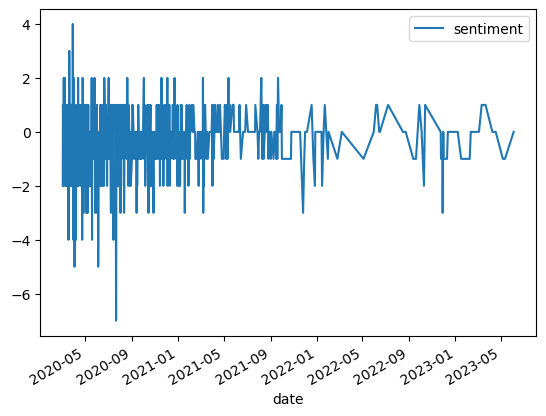

In [17]:
#
# TODO: timeseries part
#

# determine if we should output a time series of sentiment scores across time
# TODO: write code to display the time series (delete 'pass' below when you do)

# we are using pandas for this, but first we need to get it into a pandas data frame structure
series = pd.DataFrame(lSentiment, columns=['date', 'sentiment'])
# tell pandas that the date column is the one we use for indexing (or x-axis)

# pandas makes a guess at the type of the columns, but to make sure it doesn't get it wrong, we set the sentiment
# column to floats
series[['sentiment']] = series[['sentiment']].apply(pd.to_numeric)
# This step is not necessary, but pandas has a neat function that allows us to group the series at different
# resultion.  The 'how=' part tells it how to group the instances.  In this example, it sames we want to group
# by day, and add up all the sentiment scores for the same day and create a new time series called 'newSeries'
# with this day resolution

series['date'] = pd.to_datetime(series['date'])
# TODO: play with this for different resolution, '1H' is by hour, '1M' is by minute etc
# newSeries = series.resample('1H').sum()
# # this plots and shows the time series
series.set_index('date', inplace=True)
series
series.plot()
plt.show()